# Ejercicios de Procesamiento Digital de Imágenes
* Prof: Barreto, Matías
* Alumno: Alvarenga de Pedro, Hernán Misael
* DNI: 30.596.631
* email: 30596631@ifts24.edu.ar


In [ ]:
!pip install scikit-image watermark -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

In [ ]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2025-04-15T21:14:34.025868+00:00

Python implementation: CPython
Python version       : 3.11.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

numpy     : 2.0.2
matplotlib: 3.10.0
cv2       : 4.11.0



In [ ]:
!wget https://images.unsplash.com/photo-1551410224-699683e15636?q=80&w=1964&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D

--2025-04-15 21:14:34--  https://images.unsplash.com/photo-1551410224-699683e15636?q=80
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 781985 (764K) [image/jpeg]
Saving to: ‘photo-1551410224-699683e15636?q=80’

photo-1551410224-69 100%[===================>] 763.66K  --.-KB/s    in 0.06s   

2025-04-15 21:14:34 (13.0 MB/s) - ‘photo-1551410224-699683e15636?q=80’ saved [781985/781985]



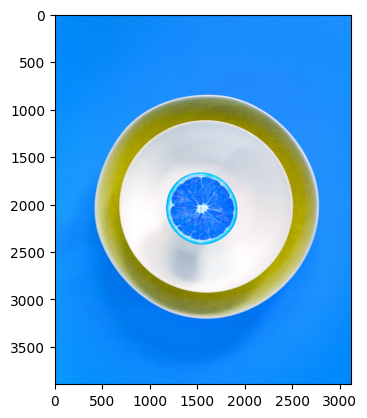

In [ ]:
naranja = imread('/content/photo-1551410224-699683e15636?q=80')
plt.imshow(naranja)
plt.show()

In [ ]:
def data_img(naranja):
  print('Tamaño = ',naranja.shape)
  print('Max  = ',np.max(naranja))
  print('Min  = ',np.min(naranja))

data_img(naranja)

Tamaño =  (3895, 3116, 3)
Max  =  255
Min  =  0


## Espacios de color

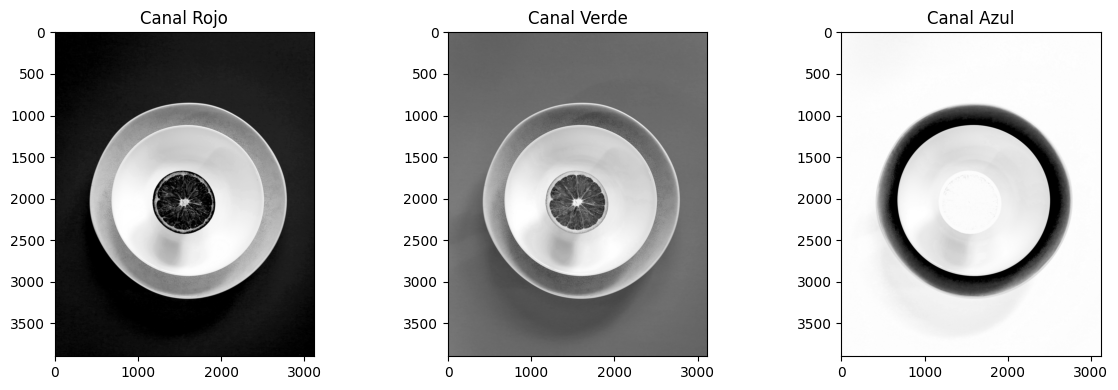

In [ ]:
# Define una figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Mostrar cada canal de color en un subplot
axs[0].imshow(naranja[:, :, 0], cmap='gray')  # Canal Rojo
axs[0].set_title('Canal Rojo')

axs[1].imshow(naranja[:, :, 1], cmap='gray')  # Canal Verde
axs[1].set_title('Canal Verde')

axs[2].imshow(naranja[:, :, 2], cmap='gray')  # Canal Azul
axs[2].set_title('Canal Azul')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Debido a que la imagen está siendo procesada en BGR (inversión de los canales de color), observamos que el canal rojo es el que presenta una mayor ausencia de tonalidades en esa gama, mientras que el canal azul se muestra pleno de información, es decir, tonalidades grises alcanzando valores máximos cercanos al blanco. Pero debiéramos considerar que el canal azul sería el canal rojo, si estuviéramos viendo la imagen en RGB.

In [ ]:
prom_rojo = np.mean(naranja[:, :, 0])
prom_verde = np.mean(naranja[:, :, 1])
prom_azul = np.mean(naranja[:, :, 2])

print("El promedio de cada canal es:")
print("Canal Rojo:", prom_rojo)
print("Canal Verde:", prom_verde)
print("Canal Azul:", prom_azul)

c_mayor = np.argmax([prom_rojo, prom_verde, prom_azul])

if c_mayor == 0:
    print("El canal rojo tiene mayor información.")
elif c_mayor == 1:
    print("El canal verde tiene mayor información.")
else:
    print("El canal azul tiene mayor información.")

El promedio de cada canal es:
Canal Rojo: 76.7490181118283
Canal Verde: 158.71303858836168
Canal Azul: 221.91042538325524
El canal azul tiene mayor información.


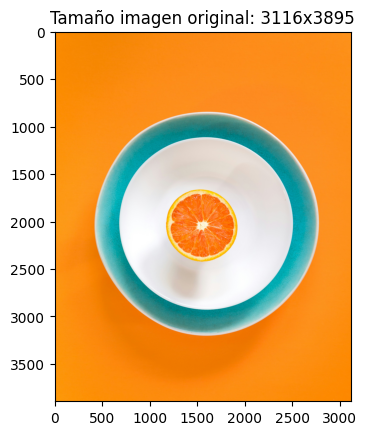

In [ ]:
naranja_rgb = cv2.cvtColor(naranja, cv2.COLOR_BGR2RGB)
plt.imshow(naranja_rgb)
plt.title(f"Tamaño imagen original: {naranja.shape[1]}x{naranja.shape[0]}")

plt.show()

La razón por la cual los colores se ven diferentes cuando se convierte una imagen de BGR a RGB tiene que ver con cómo se almacenan y se visualizan los canales de color. OpenCV almacena y muestra los colores invirtiendo la forma standard de almacenamiento, BGR, en vez de RGB.

## Muestreo

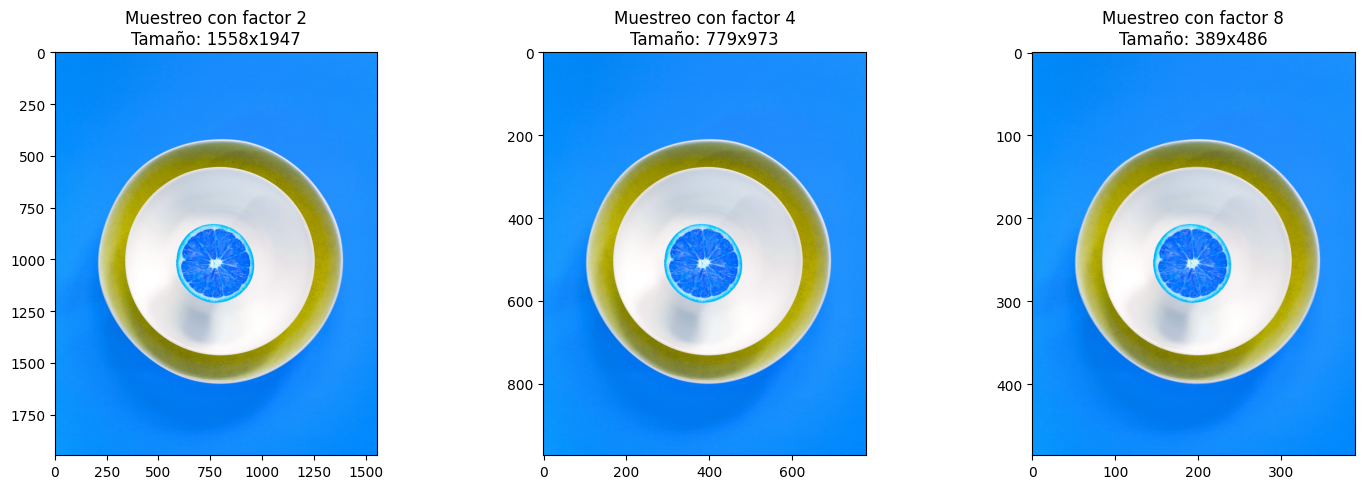

In [ ]:
factores = [2, 4, 8]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, f in enumerate(factores):  # enumerate para obtener el índice i
    alto_f = int(naranja.shape[0] / f)
    ancho_f = int(naranja.shape[1] / f)

    # Redimensionar la imagen
    img_muestreo = cv2.resize(naranja, (ancho_f, alto_f), interpolation=cv2.INTER_AREA)

    axs[i].imshow(img_muestreo)
    axs[i].set_title(f'Muestreo con factor {f}\nTamaño: {img_muestreo.shape[1]}x{img_muestreo.shape[0]}')

plt.tight_layout()
plt.show()

In [ ]:
factores = [2, 4, 8]

img_size_original = naranja.shape[0] * naranja.shape[1]

for f in factores:
    alto_f = int(naranja.shape[0] / f)
    ancho_f = int(naranja.shape[1] / f)

    # Redimensionar la imagen
    img_muestreo = cv2.resize(naranja, (ancho_f, alto_f), interpolation=cv2.INTER_AREA)

    img_size_muestreo = img_muestreo.shape[0] * img_muestreo.shape[1]
    porcentaje_reducc = ((img_size_original - img_size_muestreo) / img_size_original) * 100

    print(f'Reducción con factor {f}: {porcentaje_reducc:.2f}%')  # Mostrar la reducción para cada factor

Reducción con factor 2: 75.01%
Reducción con factor 4: 93.75%
Reducción con factor 8: 98.44%


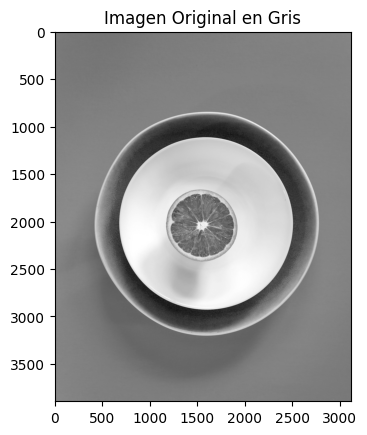

In [ ]:
naranja_gris = cv2.cvtColor(naranja, cv2.COLOR_BGR2GRAY)
plt.imshow(naranja_gris, cmap='gray')
plt.title('Imagen Original en Gris')
plt.show()

## Cuantización

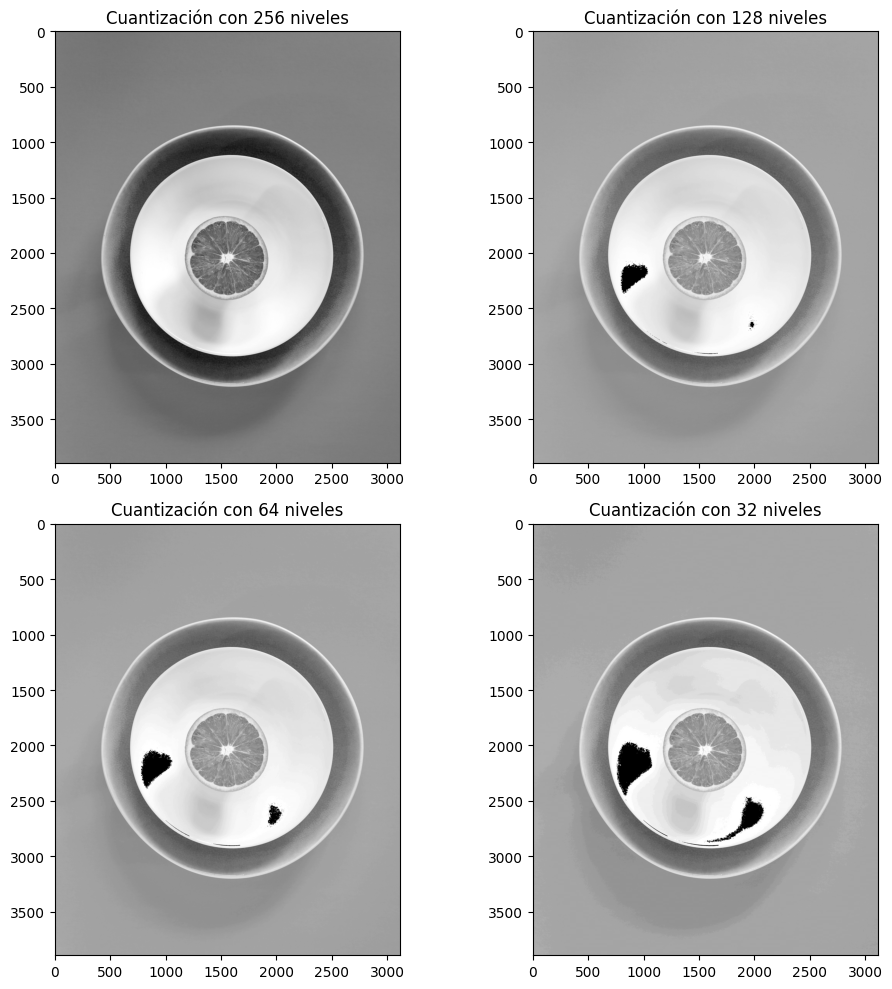

In [ ]:
cuantizacion = [256, 128, 64, 32]
img_gris = cv2.cvtColor(naranja, cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

for i, c in enumerate(cuantizacion):
    # Calcula el paso de la cuantizacion
    paso = 256 / c

    # Cuantización de la img
    img_cuantizada = np.round(img_gris / paso) * paso

    # Convierte la img cuantizada a uint8 para visualizarla
    img_cuantizada = img_cuantizada.astype(np.uint8)

    axs[i].imshow(img_cuantizada, cmap='gray')
    axs[i].set_title(f'Cuantización con {c} niveles')  # Set title with quantization level

plt.tight_layout()
plt.show()

En el paso de cuantización de la imagen de 256 a 128 comienza a ser visible la reducción de la imagen, dado que se reduce el tamaño de su brillo a la mitad, pero esto se aprecia solo en un pequeño detalle, que es el espacio no sombreado por el objeto, la naranja, proyectado sobre el plato. En realidad lo que está ocurriendo es que en esta reducción, se genera una sustracción del blanco, que es el máximo de información en ese punto, y al verse reducido su brillo a la mitad, ese espacio no puede ser completado, y se genera un vacio representado por el color negro pleno en la imagen.
No obstante se debe aclarar que en el paso de 256 a 128 estamos pasando de 8 bits de información por canal a 7 bits de información, por lo que el resto de la imagen presenta variaciones muy tenues, apreciables por ejemplo en el tono gris del borde del plato o en el interior de la naranja. Este efecto se expande a medida que la reducción aumenta a 64 y luego, por supuesto, a 32, en estos niveles la degradación del brillo se hace muy notoria y se aprecia con claridad en en el interior blanco del plato.

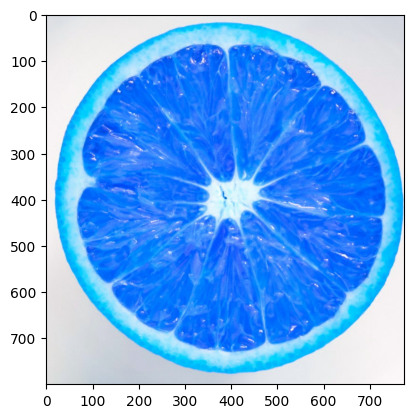

In [ ]:
naranja_crp = naranja[1650:2450, 1150:1925]
plt.imshow(naranja_crp)

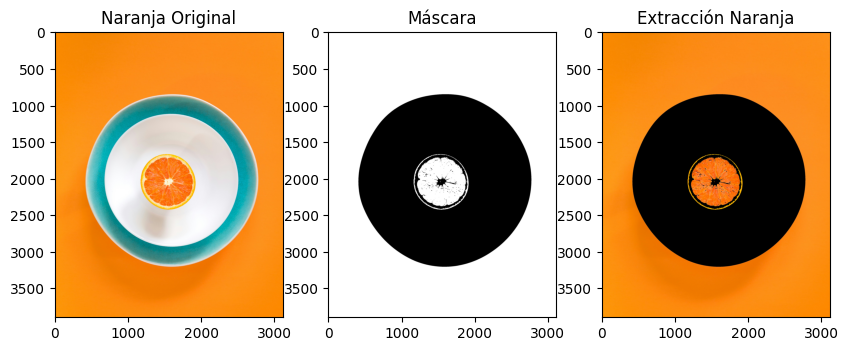

In [ ]:
# Definir los umbrales para el color específico (ajusta según sea necesario)
# Ejemplo para el color naranja:
umbral_bajo = np.array([100, 50, 0])  # Valores mínimos para R, G, B
umbral_alto = np.array([255, 200, 100])  # Valores máximos para R, G, B

# Crear una máscara para los píxeles dentro del rango de color
mascara = cv2.inRange(naranja_rgb, umbral_bajo, umbral_alto)

# Aplicar la máscara a la imagen original para extraer el objeto
naranja_ext = cv2.bitwise_and(naranja_rgb, naranja_rgb, mask=mascara)

# Mostrar la imagen original, la máscara y el objeto extraído
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(naranja_rgb)
plt.title('Naranja Original')
plt.subplot(1, 3, 2)
plt.imshow(mascara, cmap='gray')
plt.title('Máscara')
plt.subplot(1, 3, 3)
plt.imshow(naranja_ext)
plt.title('Extracción Naranja')
plt.show()

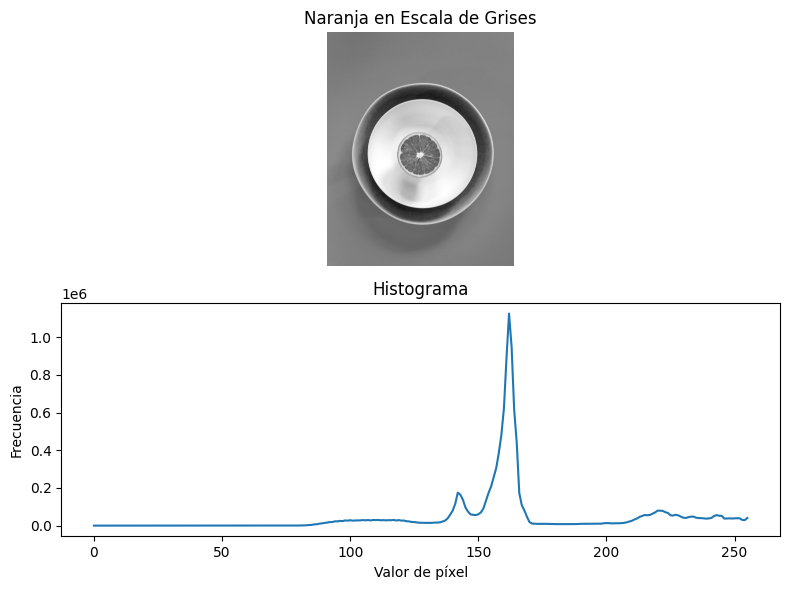

In [ ]:
# Convertir la imagen a escala de grises (si no lo está ya)
naranja_gris = cv2.cvtColor(naranja, cv2.COLOR_BGR2GRAY)

# Calcular el histograma
histograma = cv2.calcHist([naranja_gris], [0], None, [256], [0, 256])

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Mostrar la imagen en escala de grises en el primer subplot
ax1.imshow(naranja_gris, cmap='gray')
ax1.set_title('Naranja en Escala de Grises')
ax1.axis('off')  # Ocultar ejes del subplot de la imagen

# Mostrar el histograma en el segundo subplot
ax2.plot(histograma)
ax2.set_title('Histograma')
ax2.set_xlabel('Valor de píxel')
ax2.set_ylabel('Frecuencia')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## Segmentación

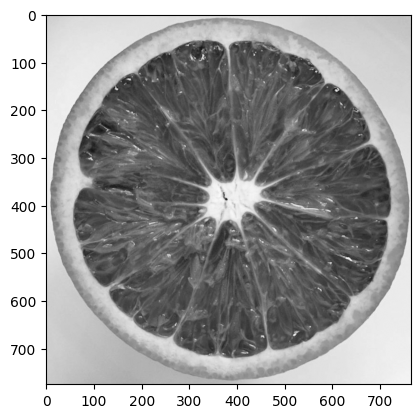

In [ ]:
naranja_gris = cv2.cvtColor(naranja, cv2.COLOR_BGR2GRAY)
naranja_crp = naranja_gris[1660:2435, 1160:1925]
plt.imshow(naranja_crp, cmap='gray')
plt.show()

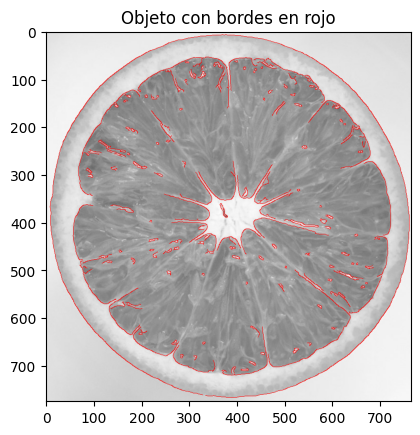

In [ ]:
# Desenfoque gaussiano para reducir el ruido
desenfoque = cv2.GaussianBlur(naranja_crp, (5, 5), 0)  # Usar naranja_crp directamente

# Detectar bordes usando Canny
bordes = cv2.Canny(desenfoque, 50, 150)

# Crear una copia de la imagen original para dibujar los bordes, pero en color
naranja_crp_con_bordes = cv2.cvtColor(naranja_crp, cv2.COLOR_GRAY2BGR)  # Convertir a color
naranja_crp_con_bordes = naranja_crp_con_bordes.copy()

# Dibujar los bordes en color rojo
naranja_crp_con_bordes[bordes != 0] = [0, 0, 255]  # BGR para rojo

# Mostrar la imagen con los bordes en rojo
plt.imshow(cv2.cvtColor(naranja_crp_con_bordes, cv2.COLOR_BGR2RGB))
plt.title('Objeto con bordes en rojo')
plt.show()